In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)


from numpy import math

In [2]:
import pandas as pd

df = pd.read_csv(
  'OnlineRetail.csv',
  encoding='utf-8'
)

print(df)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [3]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data visulization and cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 8 columns and 541909 rows are present in the data 
#### InvoiceDate is Object data type which need to be converted in DateTime. Becasue sometime it cause error

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**CustomerID and Description have null values. CustomerId is our main idenification of customer so needs to be dropped.
Because it would not help in analysis**

In [6]:
df=df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Quantity and UnitPrice are -ve and 0, so let's analse these 2 features**

In [8]:
df[df.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


**Here -ve Quantity represent either cancellation of product or returned. 
After looking the InvoiceNo in -ve Quantity row which is starting from C , 
which seems representing the Cancellation.**

In [9]:
df.drop(df[(df['Quantity']<0)].index, inplace=True)
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [10]:
df=df[df.UnitPrice>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


**UnitPrice should also be not zero so it have been taken care here**

In [11]:
# Changing InvoiceNo to string datatype
df['InvoiceNo']=df['InvoiceNo'].astype(str)

# Feature selection

**It seems we can create one feature using 2 Numerical Feature present in Data**

In [12]:
df['TotalMoneySpent']=df['Quantity']*df['UnitPrice']

In [13]:
# Converting InvoiceDate to DateTime Format
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

**Extracting year, month, day, hour and minutes from timestamp**

In [14]:
df["Year_num"] = df["InvoiceDate"].apply(lambda x: x.year)
df["Month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["Day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["Hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["Minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalMoneySpent,Year_num,Month_num,Day_num,Hour,Minute,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,December,Wednesday


In [15]:
df.Year_num.unique()

array([2010, 2011], dtype=int64)

In [16]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalMoneySpent', 'Year_num',
       'Month_num', 'Day_num', 'Hour', 'Minute', 'Month', 'Day'],
      dtype='object')

**Using the above column we can visualize , how purchasing had been done.**
**1. Top Countries who purchases most/least products**
**2. High/low selling month**
**3. High/low selling year**
**4. Day with most/least product purchasing**
**5. Customer with Highest/Lowest Purchases on the basis of CustomerId, StockId**

In [17]:
top_10_countries=df['Country'].value_counts().reset_index()
print(top_10_countries.head(10))
print(top_10_countries.tail(10))

            index  Country
0  United Kingdom   354321
1         Germany     9040
2          France     8341
3            EIRE     7236
4           Spain     2484
5     Netherlands     2359
6         Belgium     2031
7     Switzerland     1841
8        Portugal     1462
9       Australia     1182
                   index  Country
27                 Malta      112
28  United Arab Emirates       68
29    European Community       60
30                   RSA       57
31               Lebanon       45
32             Lithuania       35
33                Brazil       32
34        Czech Republic       25
35               Bahrain       17
36          Saudi Arabia        9


**UK,Germany are top while Malta and UAE are least purchasing Product coutries

In [18]:
top_5_month=df['Month'].value_counts().reset_index()
print(top_5_month.head(5))
print(top_5_month.tail(5))

       index  Month
0   November  64531
1    October  49554
2   December  43461
3  September  40028
4        May  28320
       index  Month
7     August  27007
8       July  26825
9      April  22642
10   January  21229
11  February  19927


**Novemebr have highest purchases while August have least Purchases**

In [19]:
purchase_on_day_basis=df['Day'].value_counts().reset_index()
print(purchase_on_day_basis.head(3))
print(purchase_on_day_basis.tail(3))

       index    Day
0   Thursday  80035
1  Wednesday  68885
2    Tuesday  66473
    index    Day
3  Monday  64893
4  Sunday  62773
5  Friday  54825


**Thursday is most selling product day while Monday is least**

In [20]:
purchase_on_year_basis=df['Year_num'].value_counts().reset_index()
purchase_on_year_basis

,index,Year_num
0,2011,371727
1,2010,26157


**Year 2011 have highest purchases with 132% increase in sale than year 2010**

In [21]:
top_5_purchases=df['Description'].value_counts()
print(top_5_purchases.head(5))
print(top_5_purchases.tail(5))

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
Name: Description, dtype: int64
FIRE POLISHED GLASS BRACELET RED       1
IVORY PANTRY HANGING LAMP              1
SET/3 TALL GLASS CANDLE HOLDER PINK    1
PINK EASTER HENS+FLOWER                1
FIRE POLISHED GLASS NECKL GOLD         1
Name: Description, dtype: int64


**WHITE HANGING HEART T-LIGHT HOLDER is most purchased product 
while NECKLACE+BRACELET SET PINK DAISY is least purchased product** 
Reason is obvious :)

In [22]:
top_stockcodes=df["StockCode"].value_counts()
print(top_stockcodes.head(5))
print(top_stockcodes.tail(5))

85123A    2035
22423     1723
85099B    1618
84879     1408
47566     1396
Name: StockCode, dtype: int64
90141D    1
44265     1
90162A    1
85109     1
85170A    1
Name: StockCode, dtype: int64


**StockCode 85123A purchased highest no of products while 
21667 is on least.**

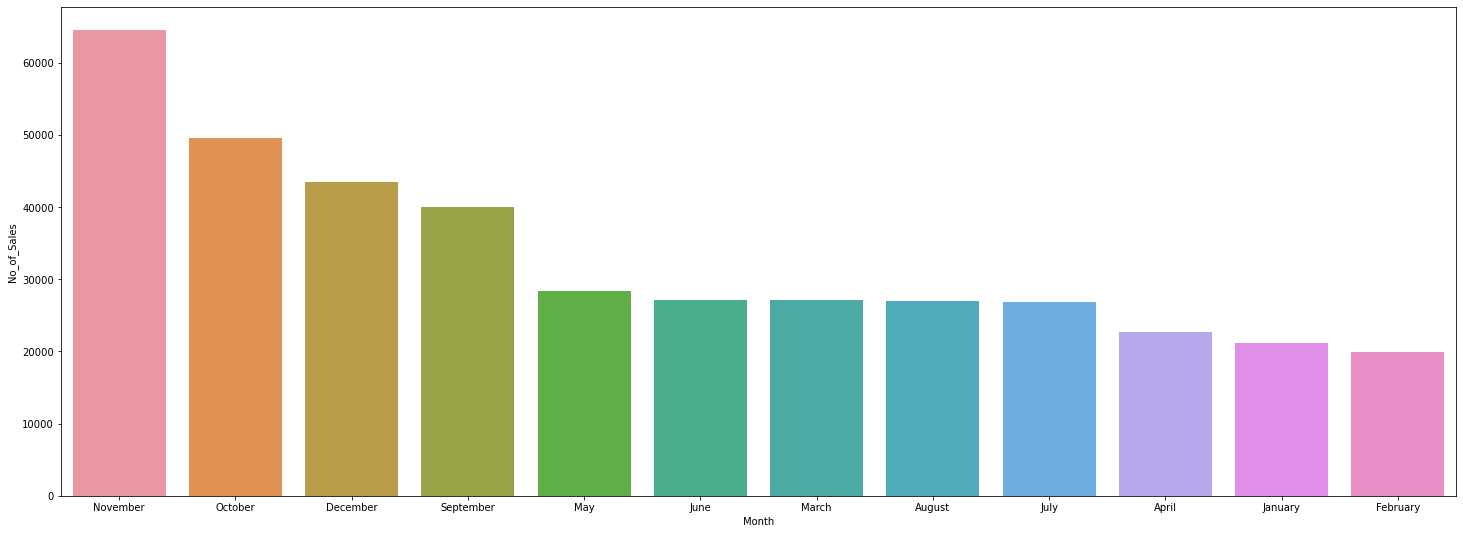

In [23]:
plt.figure(figsize=(25,9))
Sales_month_basis=df["Month"].value_counts().reset_index().reset_index().rename(columns={'index':'Month', "Month":'No_of_Sales'})
sns.barplot(x=Sales_month_basis['Month'], y=Sales_month_basis["No_of_Sales"])

In [24]:
df.shape

(397884, 16)

In [25]:
print(df["InvoiceDate"].max())
print(df["InvoiceDate"].min())

2011-12-09 12:50:00
2010-12-01 08:26:00


In [26]:
import datetime as dt
Latest_Date=dt.datetime(2011, 12, 10)

In [27]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalMoneySpent,Year_num,Month_num,Day_num,Hour,Minute,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,December,Wednesday


**Let's Create some More features**

In [28]:
df1 = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'TotalMoneySpent': lambda x: sum(x), 'Quantity': lambda x: sum(x), 'UnitPrice': lambda x: np.mean(x), 'InvoiceNo': lambda x: len(x)})
df1.rename(columns={'InvoiceDate': 'TimeToRePurchase','TotalMoneySpent':'TotalMoneySpent' ,'InvoiceNo': 'Frequency','Quantity':'TotalQuantity', 'UnitPrice':'AvgUnitPrice'}, inplace=True)
df1.reset_index()

,CustomerID,TimeToRePurchase,TotalMoneySpent,TotalQuantity,AvgUnitPrice,Frequency
0,12346.0,325,77183.60,74215,1.040000,1
1,12347.0,2,4310.00,2458,2.644011,182
2,12348.0,75,1797.24,2341,5.764839,31
3,12349.0,18,1757.55,631,8.289041,73
4,12350.0,310,334.40,197,3.841176,17
...,...,...,...,...,...,...
4333,18280.0,277,180.60,45,4.765000,10
4334,18281.0,180,80.82,54,5.622857,7
4335,18282.0,7,178.05,103,5.199167,12
4336,18283.0,3,2094.88,1397,1.614987,756


In [29]:
df1.describe()

,TimeToRePurchase,TotalMoneySpent,TotalQuantity,AvgUnitPrice,Frequency
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.059474,2054.266460,1191.289073,4.467773,91.720609
std,100.012264,8989.230441,5046.081546,34.211451,228.785094
min,0.000000,3.750000,1.000000,0.122500,1.000000
25%,17.000000,307.415000,160.000000,2.203728,17.000000
50%,50.000000,674.485000,379.000000,2.917611,41.000000
75%,141.750000,1661.740000,992.750000,3.829784,100.000000
max,373.000000,280206.020000,196915.000000,2033.100000,7847.000000


### Let's check density distribution of some main features

Text(0.5, 1.0, 'Distribution of Customer Purchasing Product with No of Days Gap')

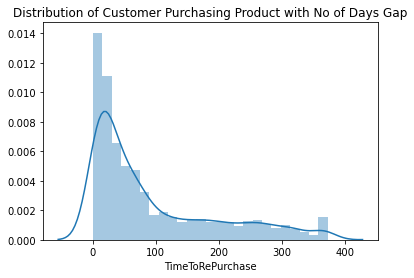

In [30]:
sns.distplot(df1['TimeToRePurchase'], kde=True)
plt.title('Distribution of Customer Purchasing Product with No of Days Gap')

Text(0.5, 1.0, 'Distribution of Frequency of purchases of Customer')

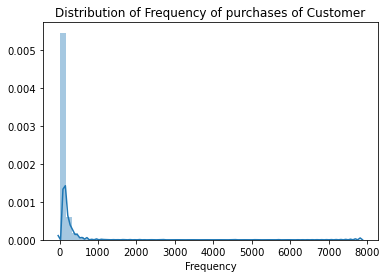

In [31]:
sns.distplot(df1['Frequency'], kde=True)
plt.title('Distribution of Frequency of purchases of Customer')

Text(0.5, 1.0, 'Distribution of Money Spent on purchases by Customer')

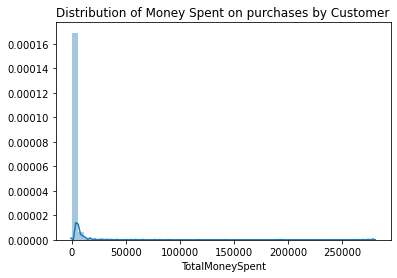

In [32]:

sns.distplot(df1['TotalMoneySpent'], kde=True)
plt.title('Distribution of Money Spent on purchases by Customer')

**From above distribution it is clear that Distribution are skewed 
which needs to be taken care**

### Check for outliers

In [33]:
df1.columns

Index(['TimeToRePurchase', 'TotalMoneySpent', 'TotalQuantity', 'AvgUnitPrice',
       'Frequency'],
      dtype='object')

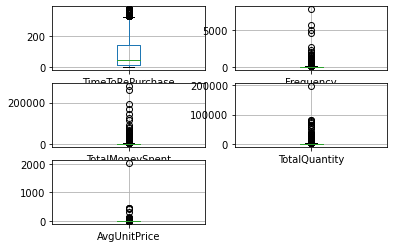

In [34]:
df_num=df1[['TimeToRePurchase', 'Frequency', 'TotalMoneySpent', 'TotalQuantity',
       'AvgUnitPrice']]
i=1
for col in list(df_num.columns):
    plt.subplot(3,2,i)
    df_num[[col]].boxplot()
    i+=1

**Outliers are present in features. so we will apply IQR to take care of outliers while
Log transformation for skewness**

In [35]:
def outliers_treatment(data):
    sorted(data)
    Q1,Q3=np.percentile(data, [25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 *IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [36]:
lowerbound, upperbound=outliers_treatment(df1.TimeToRePurchase)
df1.drop(df1[(df1.TimeToRePurchase > upperbound) | (df1.TimeToRePurchase < lowerbound)].index, inplace=True)

In [37]:
df1.TotalMoneySpent.values

array([77183.6 ,  4310.  ,  1797.24, ...,   178.05,  2094.88,  1837.28])

In [38]:
lowerbound, upperbound=outliers_treatment(df1.TotalMoneySpent)
df1.drop(df1[(df1.TotalMoneySpent>upperbound) | (df1.TotalMoneySpent<lowerbound)].index, inplace=True)

In [39]:
lowerbound, upperbound=outliers_treatment(df1.Frequency)
df1.drop(df1[(df1.Frequency>upperbound) | (df1.Frequency<lowerbound)].index, inplace=True)

In [40]:
lowerbound, upperbound=outliers_treatment(df1.AvgUnitPrice)
df1.drop(df1[(df1.AvgUnitPrice>upperbound) | (df1.AvgUnitPrice<lowerbound)].index, inplace=True)

In [41]:
# Handle -ve and 0 to handle infinite number during log transform
def HandleNegZeros(num):
    if num<=0:
        return 1
    else:
        return num

In [42]:
df1["TotalMoneySpent"]=[HandleNegZeros(x) for x in df1.TotalMoneySpent]
df1["TimeToRePurchase"]=[HandleNegZeros(x) for x in df1.TimeToRePurchase]
df1["Frequency"]=[HandleNegZeros(x) for x in df1.Frequency]
df1["TotalQuantity"]=[HandleNegZeros(x) for x in df1.TotalQuantity]
df1["AvgUnitPrice"]=[HandleNegZeros(x) for x in df1.AvgUnitPrice]

In [43]:
df1.columns

Index(['TimeToRePurchase', 'TotalMoneySpent', 'TotalQuantity', 'AvgUnitPrice',
       'Frequency'],
      dtype='object')

In [44]:
log_df=df1[['TimeToRePurchase', 'TotalMoneySpent', 'TotalQuantity', 'AvgUnitPrice',
       'Frequency']].apply(np.log, axis=1).round(3)

In [45]:
log_df

,TimeToRePurchase,TotalMoneySpent,TotalQuantity,AvgUnitPrice,Frequency
CustomerID,,,,,
12348.0,4.317,7.494,7.758,1.752,3.434
12350.0,5.737,5.812,5.283,1.346,2.833
12353.0,5.318,4.489,2.996,1.804,1.386
12354.0,5.447,6.984,6.273,1.505,4.060
12355.0,5.366,6.130,5.481,1.436,2.565
...,...,...,...,...,...
18278.0,4.290,5.158,4.190,1.189,2.197
18280.0,5.624,5.196,3.807,1.561,2.303
18281.0,5.193,4.392,3.989,1.727,1.946


**Since KMeans is distance based Algo so need to scale the data to avoid biasness by Model**

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(log_df)

# Kmeans Clustering

### Apply Elbow Method to know optimal number of cluster

In [47]:
from sklearn.cluster import KMeans
wcss=[]
cl_num=10
for i in range(1, cl_num):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[16820.000000000047,
 10721.729901368013,
 9205.180862039306,
 7922.577408831561,
 7124.992407143345,
 6516.9779566016605,
 6037.94722203423,
 5608.445986016447,
 5287.815685292783]

Text(0, 0.5, 'With in Cluster Sum Of Square')

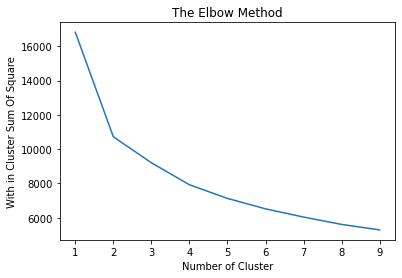

In [48]:
import matplotlib.pyplot as plt
num_clu=range(1, cl_num)
plt.plot(num_clu, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("With in Cluster Sum Of Square")

**From Elbow plot it is clear that optimum number are possible at 2 and 4**
**So let's first visualize the data then validate it**

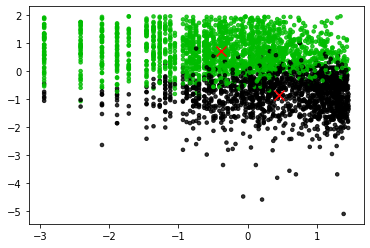

In [49]:
import matplotlib.cm as cm

kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(x_scaled)

colors = cm.nipy_spectral(cluster_labels.astype(float) /2)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], marker=".", s=50, alpha=0.8, c=colors)
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0],centers[:, 1],marker="x",c="red",s=100, zorder=10)

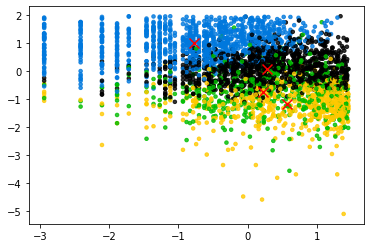

In [50]:
import matplotlib.cm as cm

kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(x_scaled)

colors = cm.nipy_spectral(cluster_labels.astype(float) /4)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], marker=".", s=50, alpha=0.8, c=colors)
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0],centers[:, 1],marker="x",c="red",s=100, zorder=10)

**With 4 cluster data seems too mixed than with 2. **
**let's validate result using silhouette score**

For n_clusters = 2 The average silhouette_score is : 0.316163824333361
For n_clusters = 3 The average silhouette_score is : 0.21493512617928762
For n_clusters = 4 The average silhouette_score is : 0.2180019317660082
For n_clusters = 5 The average silhouette_score is : 0.20341271655669935
For n_clusters = 6 The average silhouette_score is : 0.20303504662474403
For n_clusters = 7 The average silhouette_score is : 0.19828117456281172
For n_clusters = 8 The average silhouette_score is : 0.1943337774722322
For n_clusters = 9 The average silhouette_score is : 0.18895884512586625
For n_clusters = 10 The average silhouette_score is : 0.19085511948356873
For n_clusters = 11 The average silhouette_score is : 0.1941522389947007


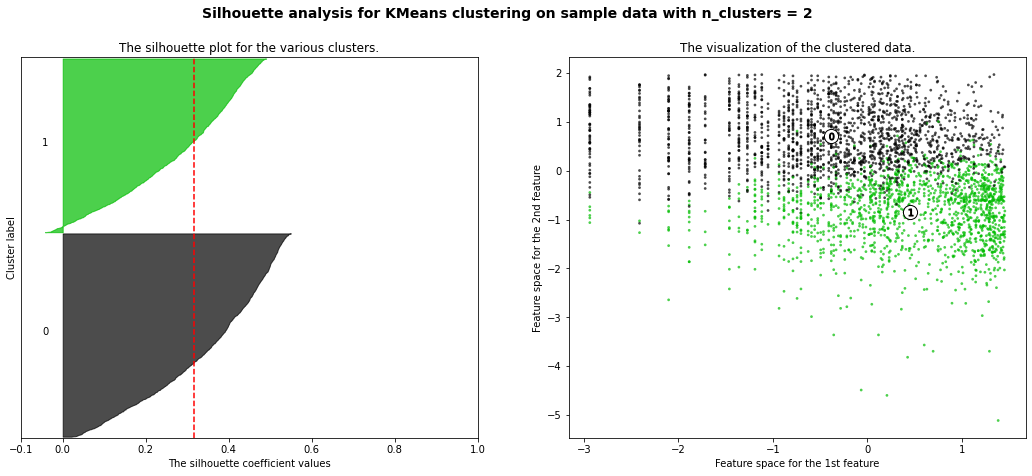

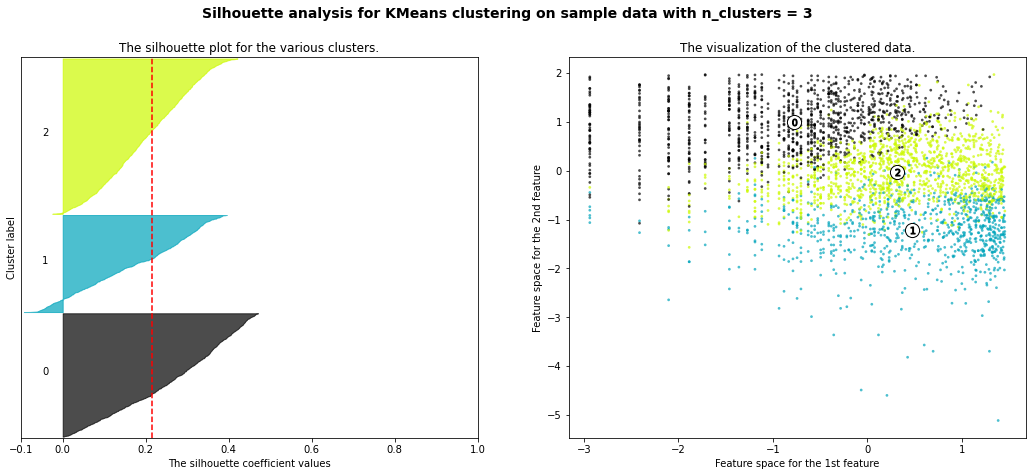

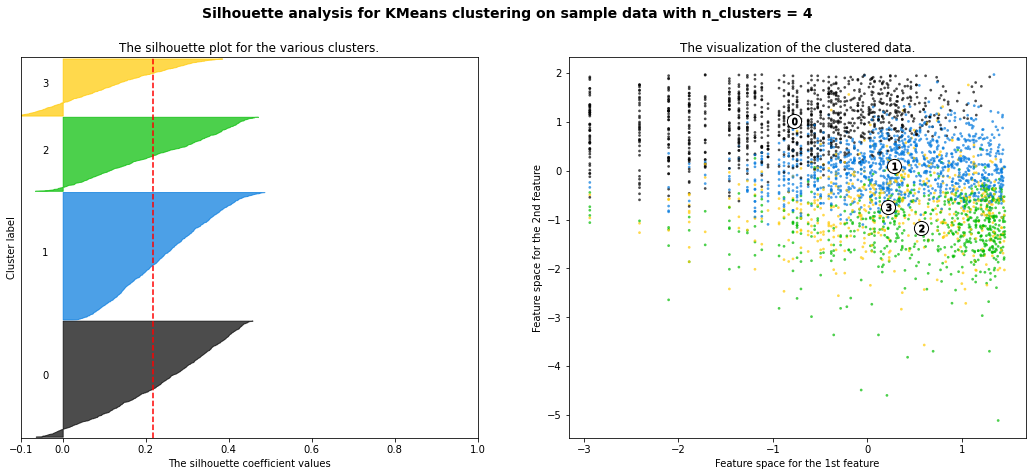

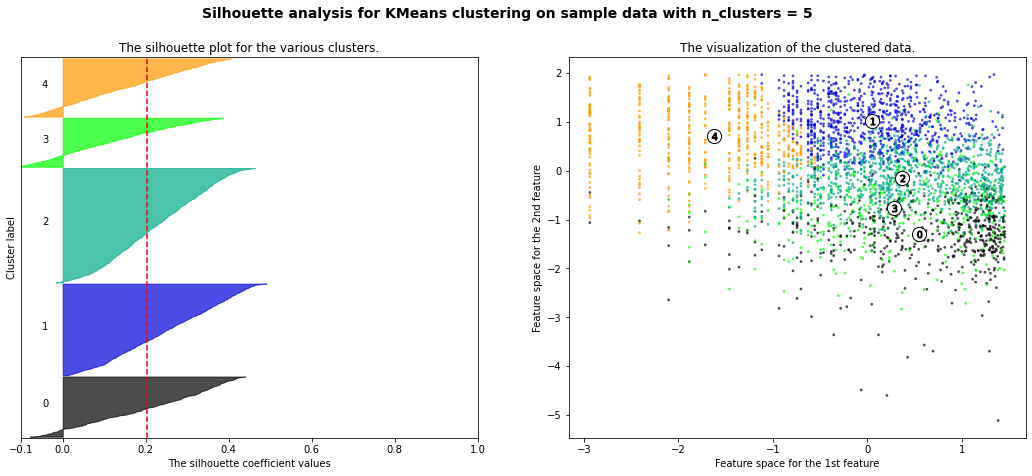

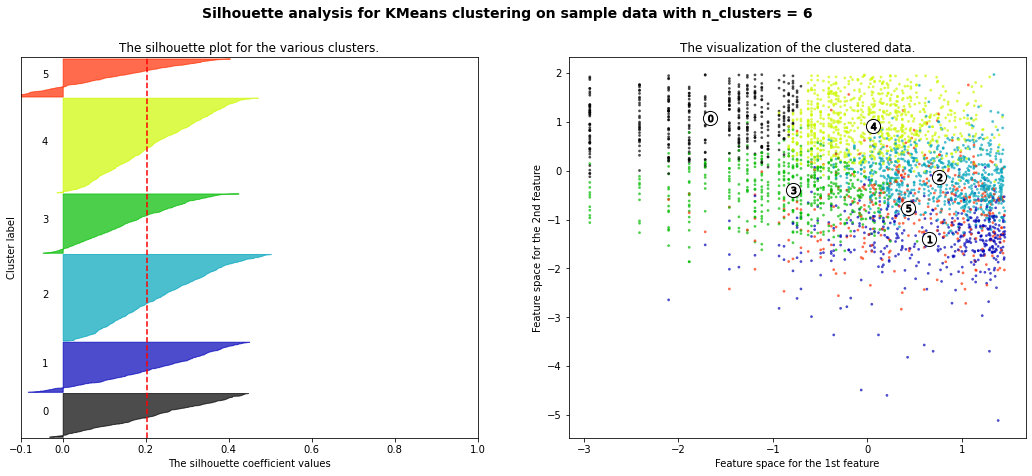

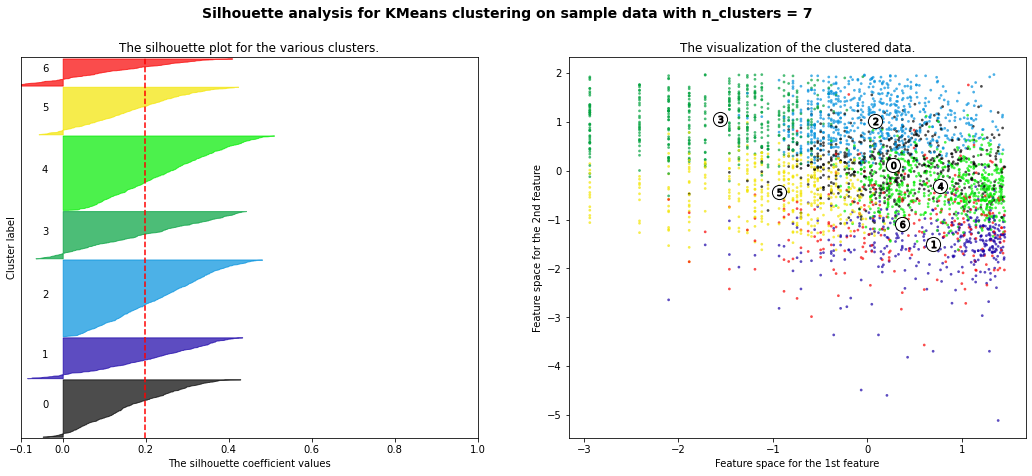

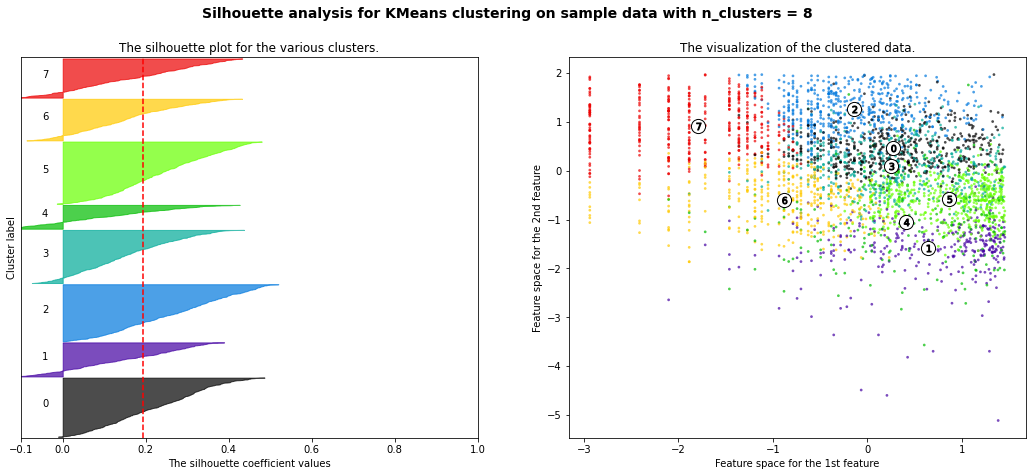

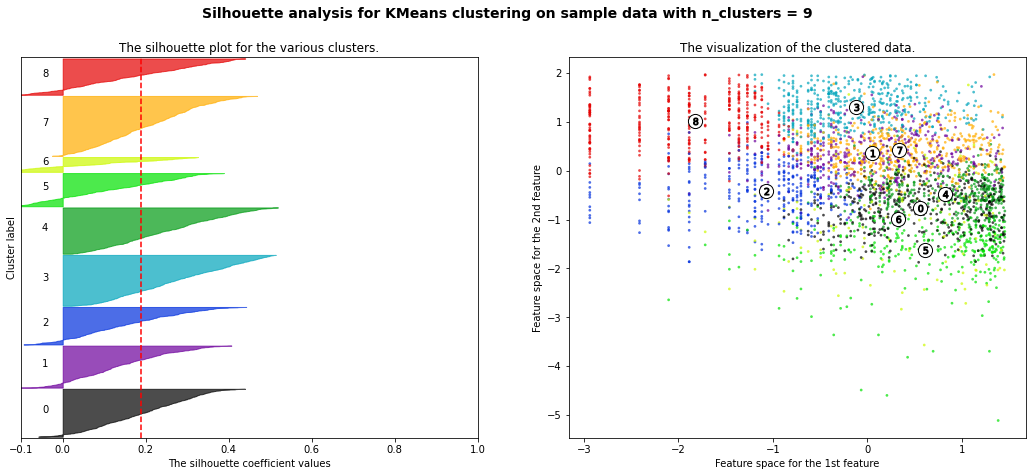

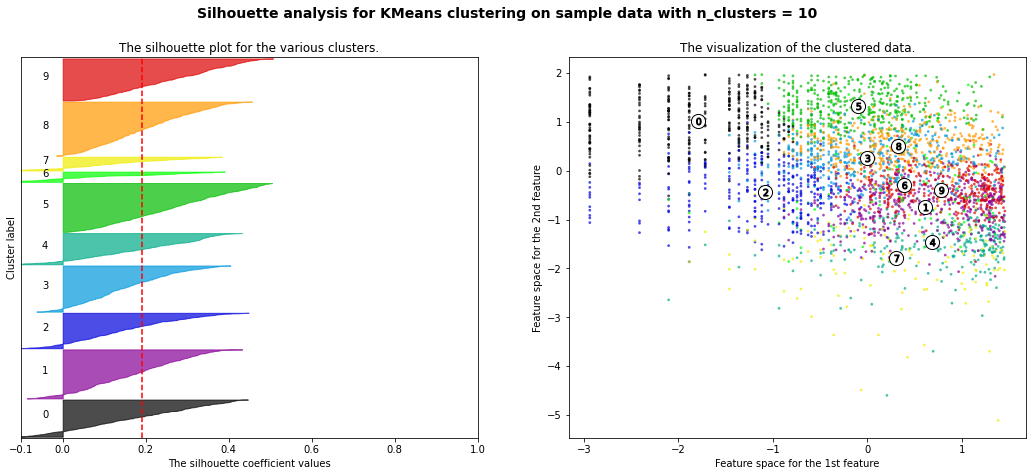

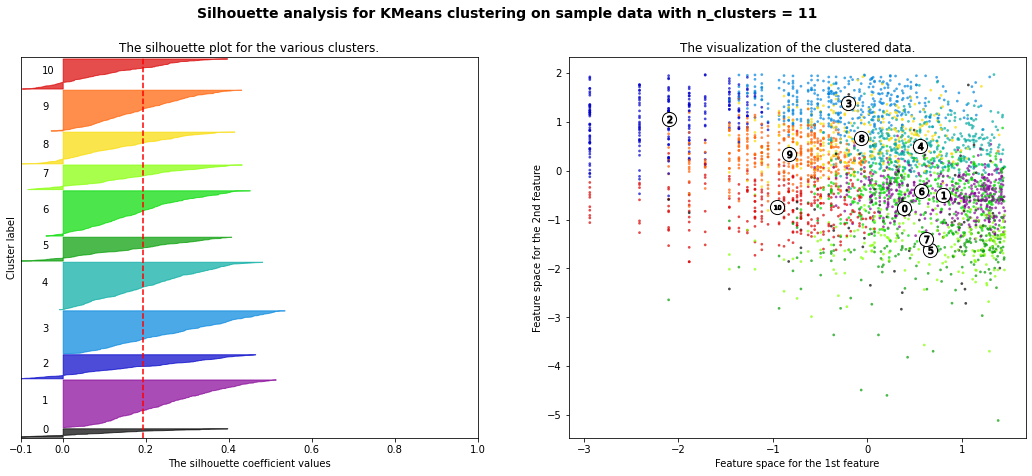

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(x_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_scaled)

    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x_scaled[:, 0], x_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Here highest score we are getting with 2 cluster. ** 
** let's validate using other measure too**

In [52]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):

    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]


    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [53]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans=KMeans(2)
kmeans.fit(x_scaled)
labels=kmeans.labels_

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++,k=2", data=x_scaled, labels=labels)

kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++,k=2", data=x_scaled, labels=labels)

kmeans = KMeans(init="random", n_clusters=4, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random,k=4", data=x_scaled, labels=labels)

kmeans = KMeans(init="random", n_clusters=4, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random,k=4", data=x_scaled, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++,k=2	0.060s	10722	0.973	0.974	0.974	0.988	0.974	0.311
k-means++,k=2	0.055s	10722	0.973	0.974	0.974	0.988	0.974	0.298
random,k=4	0.130s	7924	0.595	0.305	0.403	0.308	0.403	0.231
random,k=4	0.130s	7924	0.595	0.305	0.403	0.308	0.403	0.213
__________________________________________________________________________________


**Here we can see that Optimum no of cluster is 2**

**Because all score are high for custer 2**

### Let's plot and solve using  clusters 2

In [54]:
kmeans=KMeans(2)
cluster_labels=kmeans.fit_predict(x_scaled)
centers=kmeans.cluster_centers_

log_df['Cluster_']=kmeans.labels_
log_df

,TimeToRePurchase,TotalMoneySpent,TotalQuantity,AvgUnitPrice,Frequency,Cluster_
CustomerID,,,,,,
12348.0,4.317,7.494,7.758,1.752,3.434,1
12350.0,5.737,5.812,5.283,1.346,2.833,0
12353.0,5.318,4.489,2.996,1.804,1.386,0
12354.0,5.447,6.984,6.273,1.505,4.060,1
12355.0,5.366,6.130,5.481,1.436,2.565,0
...,...,...,...,...,...,...
18278.0,4.290,5.158,4.190,1.189,2.197,0
18280.0,5.624,5.196,3.807,1.561,2.303,0
18281.0,5.193,4.392,3.989,1.727,1.946,0


**Let's have a look , how features are showing relation with each other**

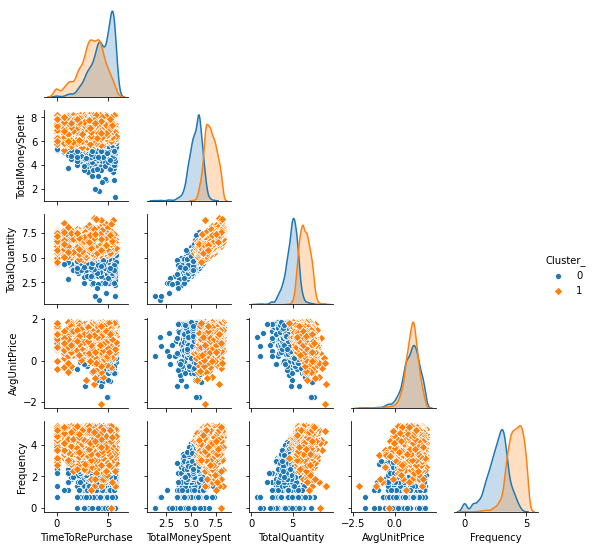

In [55]:
sns.pairplot(log_df, hue='Cluster_', markers=['o', 'D'], corner=True, height=1.5)

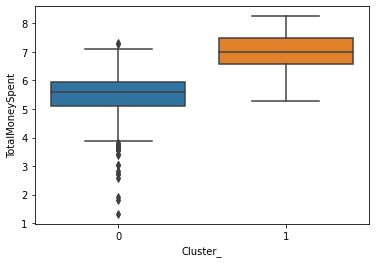

In [56]:
# Box Plot to visualize cluster vs Total Money Spent 
sns.boxplot(x='Cluster_', y='TotalMoneySpent', data=log_df)

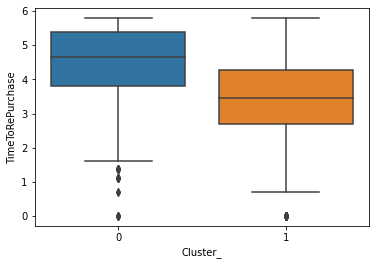

In [57]:
# Box Plot to visualize cluster vs Time to Re Purchase
sns.boxplot(x='Cluster_', y='TimeToRePurchase', data=log_df)

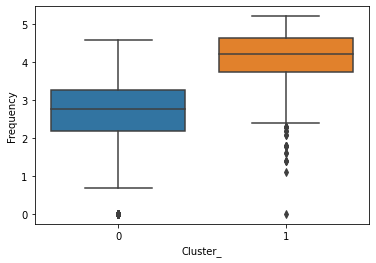

In [58]:
# Box Plot to visualize cluster vs Frequency 
sns.boxplot(x='Cluster_', y='Frequency', data=log_df)

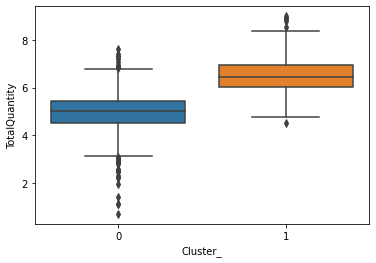

In [59]:
# Box Plot to visualize cluster vs Total Money Spent 
sns.boxplot(x='Cluster_', y='TotalQuantity', data=log_df)

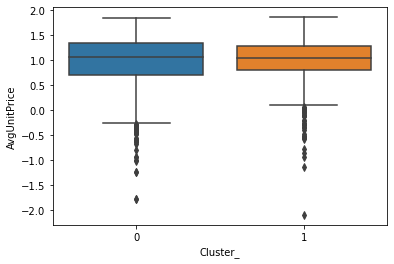

In [60]:
# Box Plot to visualize cluster vs AvgUnitPrice
sns.boxplot(x='Cluster_', y='AvgUnitPrice', data=log_df)

# Conclusion:

**1. Customer with cluster 1 spent more money on products than cluster0**

**2.Customer with cluster0 is not more recent buyer. so they are least customer but can be focus so that they can purchase freuently while customer with cluster1 are frequent buyer**


**3.Quantity purchased by customer with cluster1 is higher than cluster0**

**4.cluster 1 customer spent more average money than cluster0 customer**

# Suggestions:

**Customer with cluster 1 seems loyal and satisfied. Since most of Revenue generate by these type of customer so our focus should be on these customer. We can give them Premium Membership for being Loyal Customer**

**Customer with cluster0 seems disloyal or unsatisfied customer . Since these are least important customer and they are roamer type of customer . so we can give them discount or offer to retain these type of customer**

# Future work:

**There are a lot of feature which can be generated using time, country and other feature which might be helpful**

**Mostly Initialization is done randomly which can lead to unstable cluster. we can use KMeans++ or Medoid(better) method for 
more stable cluster**

**we can segment customer using Amont of Money Spent by customer which can be helpful to treat them differently which can leads to better sale in future**

**Since silhouette score is costly so we can use other metrics for evaluation**